In [58]:
import os
from tensorflow import keras 
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model, Sequential,load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import seaborn as sns

In [22]:


raw_data_path1 ="D:/Master/Reseach/Dataset-for-Crop-Pest-and-Disease-Detection/Raw-Data/CCMT-Dataset"
crops_folder= os.listdir(raw_data_path1)
print(crops_folder)
tomatos_raw_data_path = os.path.join(raw_data_path1,"Tomato")
print(tomatos_raw_data_path)
tomatos_folder= os.listdir(tomatos_raw_data_path)
print(tomatos_folder)


['Cashew', 'Cassava', 'Maize', 'Tomato']
D:/Master/Reseach/Dataset-for-Crop-Pest-and-Disease-Detection/Raw-Data/CCMT-Dataset\Tomato
['healthy', 'leaf blight', 'leaf curl', 'septoria leaf spot', 'verticulium wilt']


Total images loaded: 5


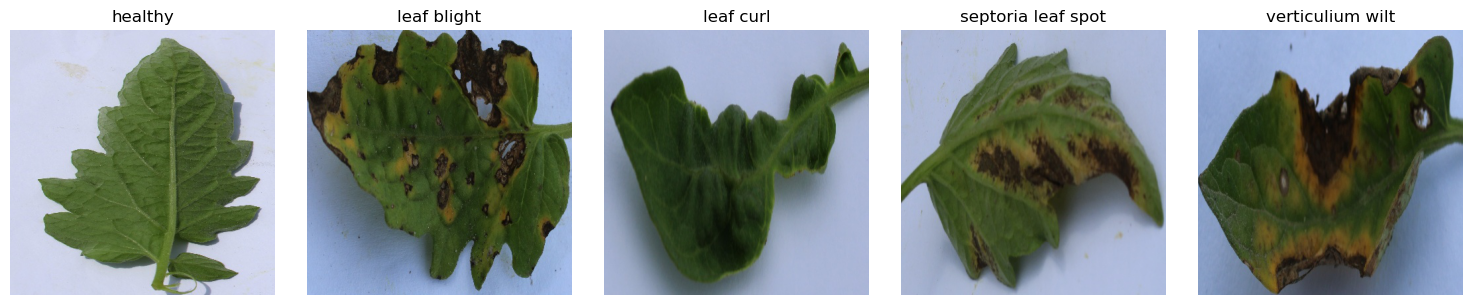

In [24]:
# Function to display images
# Function to display images from multiple folders
def show_images_from_folders(base_dir, tomatos_folders, num_images=10):
    images_to_display = []  # Store images and titles for display
    
    # Iterate over disease/pest category folders
    for subfolder in tomatos_folders:
        subfolder_path = os.path.join(base_dir, subfolder)

        # Ensure it's a directory
        if os.path.isdir(subfolder_path):
            # Get all image files in the subfolder
            images = [f for f in os.listdir(subfolder_path) if f.endswith('.jpg')]
                        
            # Display a few images from each subfolder
            for img_file in images[:num_images]: 
                img_path = os.path.join(subfolder_path, img_file)
                try:
                    img = Image.open(img_path)
                    images_to_display.append((img, f"{subfolder}"))  # Removed undefined 'crop' variable
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")

    # Calculate grid size dynamically
    total_images = len(images_to_display)
    print(f"Total images loaded: {total_images}")
    
    if total_images == 0:
        print("No images to display.")
        return

    cols = 5
    rows = -(-total_images // cols)  # Ceiling division for rows
    plt.figure(figsize=(15, rows * 3))                 
    
    # Plot images
    for i, (img, title) in enumerate(images_to_display):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(title)

    plt.tight_layout()
    plt.show()


# Call the function to display images
show_images_from_folders(tomatos_raw_data_path, tomatos_folder, num_images=1)

In [26]:
train_path ="D:/Master/Reseach/Dataset-for-Crop-Pest-and-Disease-Detection/CCMT Dataset-Augmented/Tomato/train_set/"
test_path = "D:/Master/Reseach/Dataset-for-Crop-Pest-and-Disease-Detection/CCMT Dataset-Augmented/Tomato/test_set/"

In [28]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True,shear_range=.2,rotation_range=.2)
test_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory(train_path,
                                               target_size=(224,224),class_mode="categorical",batch_size=32,shuffle=True)
test_set=test_datagen.flow_from_directory(test_path,
                                          target_size=(224,224),batch_size=32,class_mode="categorical",shuffle=True)


Found 10000 images belonging to 5 classes.
Found 2500 images belonging to 5 classes.


In [34]:
vgg16=VGG16(include_top=False,weights="imagenet",input_shape=[224,224,3])

In [36]:
for layer in vgg16.layers:
  layer.trainable=False

In [38]:
folder=glob("D:/Master/Reseach/Dataset-for-Crop-Pest-and-Disease-Detection/CCMT Dataset-Augmented/Tomato/train_set/*")
folder

['D:/Master/Reseach/Dataset-for-Crop-Pest-and-Disease-Detection/CCMT Dataset-Augmented/Tomato/train_set\\healthy',
 'D:/Master/Reseach/Dataset-for-Crop-Pest-and-Disease-Detection/CCMT Dataset-Augmented/Tomato/train_set\\leaf blight',
 'D:/Master/Reseach/Dataset-for-Crop-Pest-and-Disease-Detection/CCMT Dataset-Augmented/Tomato/train_set\\leaf curl',
 'D:/Master/Reseach/Dataset-for-Crop-Pest-and-Disease-Detection/CCMT Dataset-Augmented/Tomato/train_set\\septoria leaf spot',
 'D:/Master/Reseach/Dataset-for-Crop-Pest-and-Disease-Detection/CCMT Dataset-Augmented/Tomato/train_set\\verticulium wilt']

In [40]:
x=Flatten()(vgg16.output)
pred_vgg16=Dense(units=len(folder),activation="sigmoid")(x)
vgg16_model=Model(inputs=vgg16.input,outputs=pred_vgg16)

In [42]:
vgg16_model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

### Final Architecture of VGG16

In [44]:
vgg16_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │       125,445 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,840,133 (56.61 MB)

 Trainable params: 125,445 (490.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [46]:
transfer_vgg16=vgg16_model.fit(training_set,validation_data=test_set,epochs=15,
                                         validation_steps=len(test_set),steps_per_epoch=len(training_set))

C:\Users\santo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1280s 4s/step - accuracy: 0.3977 - loss: 0.4821 - val_accuracy: 0.5536 - val_loss: 0.3920
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1262s 4s/step - accuracy: 0.6153 - loss: 0.3427 - val_accuracy: 0.5536 - val_loss: 0.3756
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1268s 4s/step - accuracy: 0.6657 - loss: 0.3062 - val_accuracy: 0.6092 - val_loss: 0.3704
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1256s 4s/step - accuracy: 0.7142 - loss: 0.2781 - val_accuracy: 0.6224 - val_loss: 0.3515
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1627s 5s/step - accuracy: 0.7333 - loss: 0.2622 - val_accuracy: 0.6796 - val_loss: 0.3127
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1238s 4s/step - accuracy: 0.7687 - loss: 0.2397 - val_accuracy: 0.7136 - val_loss: 0.2963
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1284s 4s/step - accuracy: 0.8009 - loss: 0.2221 - val_accuracy: 0.6968 - val_loss: 0.3024
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1289s 4s/step - accuracy: 0.8053 - loss: 0.2156 - 

In [48]:
# Scores is just a list containing loss and accuracy value
scores=vgg16_model.evaluate(training_set)
scores2=vgg16_model.evaluate(test_set)
print("Training Loss is :"+str(scores[0]))
print("Training Accuracy is :"+str(scores[1]*100)+" %")
print("Testing Loss is :"+str(scores2[0]))
print("Testing Accuracy is :"+str(scores2[1]*100)+" %")

313/313 ━━━━━━━━━━━━━━━━━━━━ 991s 3s/step - accuracy: 0.8784 - loss: 0.1518
79/79 ━━━━━━━━━━━━━━━━━━━━ 247s 3s/step - accuracy: 0.7407 - loss: 0.2726
Training Loss is :0.15245193243026733
Training Accuracy is :87.84000277519226 %
Testing Loss is :0.2750735282897949
Testing Accuracy is :73.55999946594238 %


In [50]:
vgg16_model.save("VGG16_TomatoModel.h5")

In [52]:
test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)
predictions = vgg16_model.predict(test_set, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes and class Labels
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())   

C:\Users\santo\AppData\Local\Temp\ipykernel_13776\825571824.py:1: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)


79/79 ━━━━━━━━━━━━━━━━━━━━ 245s 3s/step


In [54]:
#Classification Report
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

                    precision    recall  f1-score   support

           healthy       0.21      0.21      0.21       500
       leaf blight       0.22      0.18      0.20       500
         leaf curl       0.20      0.19      0.20       500
septoria leaf spot       0.18      0.25      0.21       500
  verticulium wilt       0.17      0.14      0.16       500

          accuracy                           0.19      2500
         macro avg       0.20      0.19      0.19      2500
      weighted avg       0.20      0.19      0.19      2500



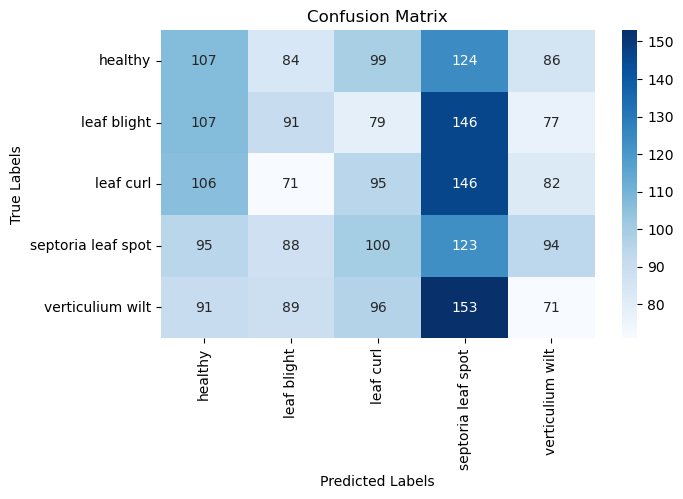

In [60]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
# Plot confusion matrix
plt.figure(figsize=(7, 4))
sns.heatmap(confusion_matrix(true_classes,predicted_classes),annot=True,fmt='.5g',cmap="Blues", xticklabels=class_labels, yticklabels=class_labels) 
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

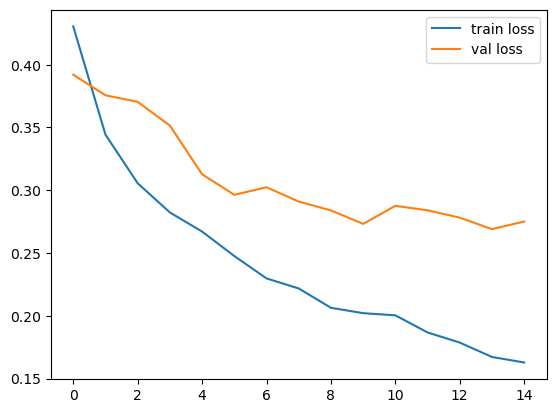

<Figure size 640x480 with 0 Axes>

In [62]:
# plot the loss
plt.plot(transfer_vgg16.history['loss'], label='train loss')
plt.plot(transfer_vgg16.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


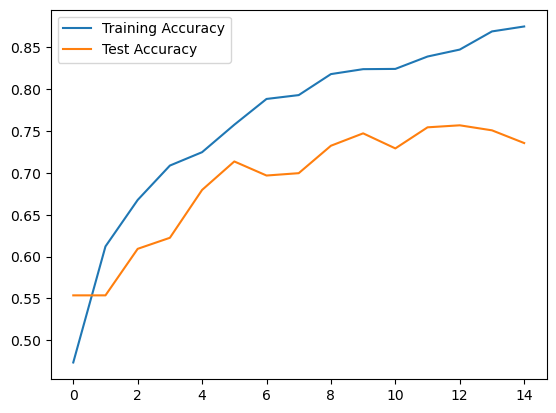

<Figure size 640x480 with 0 Axes>

In [64]:
# plot the accuracy
plt.plot(transfer_vgg16.history['accuracy'], label='Training Accuracy')
plt.plot(transfer_vgg16.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [66]:
y_pred_vgg16=vgg16_model.predict(test_set)

79/79 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step
